# Reproducibile Sentiment Analysis using Social Media Data

In this class, we will focus on one of the most popular applications of Natural Language Processing (NLP) - sentiment analysis. Sentiment analysis is a method used to identify and extract subjective information from source materials, such as social media posts. It allows us to understand people's opinions and emotions towards certain topics, brands, products, or events.

This session will be divided into four main sections:

1. Introduction to Sentiment Analysis
2. Sentiment Analysis Approaches
3. Sentiment Analysis Libraries in Python
4. Sentiment Analysis of Social Media Data
5. Ensuring Reproducibility in Text Analysis

In [1]:
!pip install nltk 
!pip install -U textblob

  Using cached nltk-3.8.1-py3-none-any.whl (1.5 MB)
  Using cached regex-2023.5.5-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (769 kB)
  Using cached click-8.1.3-py3-none-any.whl (96 kB)
  Using cached textblob-0.17.1-py2.py3-none-any.whl (636 kB)


In [3]:
# Import necessary libraries
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob
import re

## 1. Introduction to Sentiment Analysis

Sentiment Analysis, also known as opinion mining, involves determining the writer's attitude or sentiment expressed in a piece of text. This sentiment could be a positive, negative, or neutral emotion towards the topic being discussed.

Applications of sentiment analysis include **brand monitoring**, **product analysis**, **customer feedback**, and **market research**, among others. In the context of social media data, it can help understand the public sentiment towards a particular topic, event, product, or policy.

## 2. Sentiment Analysis Approaches

There are mainly three types of sentiment analysis approaches:

- **Lexicon-based approach:** This approach uses a list of words each tagged with a sentiment score and calculates the sentiment of a text based on the scores of the words present in it.

- **Machine Learning approach:** This approach involves training a classifier with labeled data (text labeled with sentiments) and then using the trained model to predict the sentiment of unseen data.

- **Hybrid approach:** This approach combines both the lexicon-based and machine learning methods.

## 3. Sentiment Analysis Libraries in Python

Python offers several libraries for sentiment analysis. Here, we will look at two of them:

- **TextBlob:** TextBlob is a Python library for processing textual data. It provides a simple API for diving into common NLP tasks such as part-of-speech tagging, noun phrase extraction, sentiment analysis, etc.

- **NLTK's Vader:** Vader (Valence Aware Dictionary and sEntiment Reasoner) is a lexicon and rule-based sentiment analysis tool that is specifically attuned to sentiments expressed in social media.

In [4]:
# Define a function for sentiment analysis using TextBlob
def get_sentiment_textblob(text):
    sentiment = TextBlob(text).sentiment.polarity
    if sentiment > 0:
        return "Positive"
    elif sentiment < 0:
        return "Negative"
    else:
        return "Neutral"

In [5]:
# Define a function for sentiment analysis using NLTK's Vader
from nltk.sentiment.vader import SentimentIntensityAnalyzer

def get_sentiment_vader(text):
    sia = SentimentIntensityAnalyzer()
    sentiment = sia.polarity_scores(text)
    
    if sentiment['compound'] > 0.05:
        return "Positive"
    elif sentiment['compound'] < -0.05:
        return "Negative"
    else:
        return "Neutral"

The `SentimentIntensityAnalyzer()` function from the `nltk.sentiment.vader` module returns a dictionary of sentiment scores calculated for the input text. These scores include 'positive', 'negative', 'neutral', and 'compound'.

The 'compound' score is a metric that calculates the sum of all the lexicon ratings which have been normalized between -1 (most extreme negative) and +1 (most extreme positive). It gives an overall sentiment score for the whole text.

In the function `get_sentiment_vader()`, the boundaries of 0.05 and -0.05 for the 'compound' score are used based on the recommendation by the creators of VADER sentiment analysis tool.

They suggest that:
- Positive sentiment: compound score > 0.05
- Neutral sentiment: compound score between -0.05 and 0.05
- Negative sentiment: compound score < -0.05

These boundaries are used to classify the overall sentiment of the text as 'Positive', 'Negative', or 'Neutral'. This classification is based on empirically and heuristically observed conventions and might not always be the best fit for every context. It's always good to validate these boundaries with your specific dataset and context.

## 4. Sentiment Analysis of Social Media Data

Let's apply sentiment analysis to real-world social media data. For this class, we will use a dataset of Twitter posts about a specific topic (e.g., a brand, product, or event). In the next class, we will delve into more advanced applications of sentiment analysis and how to ensure reproducibility in your text analysis projects.

First, let load our data into a pandas DataFrame. Then we'll apply our sentiment analysis functions to the text data.

### 4.1 Load the dataset

In [6]:
# Load the data
df = pd.read_csv('tweets.csv')

# Display the first 5 rows
df.head()

,Unnamed: 0,post_id,post_created,post_text,user_id,followers,friends,favourites,statuses,retweets,label
0,0,637894677824413696,Sun Aug 30 07:48:37 +0000 2015,It's just over 2 years since I was diagnosed w...,1013187241,84,211,251,837,0,1
1,1,637890384576778240,Sun Aug 30 07:31:33 +0000 2015,"It's Sunday, I need a break, so I'm planning t...",1013187241,84,211,251,837,1,1
2,2,637749345908051968,Sat Aug 29 22:11:07 +0000 2015,Awake but tired. I need to sleep but my brain ...,1013187241,84,211,251,837,0,1
3,3,637696421077123073,Sat Aug 29 18:40:49 +0000 2015,RT @SewHQ: #Retro bears make perfect gifts and...,1013187241,84,211,251,837,2,1
4,4,637696327485366272,Sat Aug 29 18:40:26 +0000 2015,It’s hard to say whether packing lists are mak...,1013187241,84,211,251,837,1,1


### 4.2 Data Preprocessing

In [16]:
# text cleaning
def clean_text(text):
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)  # remove URLs
    text = re.sub(r'@\w+', '', text)  # remove mentions
    text = re.sub(r'#', '', text) # remove hashtag
    text = re.sub(r'\s+', ' ', text)  # remove extra spaces
    return text.strip()

df['clean_text'] = df['post_text'].apply(clean_text)

In [17]:
df["post_text"][0]

"It's just over 2 years since I was diagnosed with #anxiety and #depression. Today I'm taking a moment to reflect on how far I've come since."

In [18]:
df["clean_text"][0]

"It's just over 2 years since I was diagnosed with anxiety and depression. Today I'm taking a moment to reflect on how far I've come since."

### 4.3 Get Sentiment Scores

In [22]:
# Define a function for sentiment analysis using TextBlob
def get_sentiment_textblob(text):
    """
    this function takes text as the input and calculates the sentiment score of this given text.
    """
    sentiment = TextBlob(text).sentiment.polarity
    if sentiment > 0:
        return "Positive"
    elif sentiment < 0:
        return "Negative"
    else:
        return "Neutral"

# get continuous textblob sentiment scores
def get_sent_textblob_cont(text):
    return TextBlob(text).sentiment.polarity

# Define a function for sentiment analysis using NLTK's Vader
def get_sentiment_vader(text):
    sia = SentimentIntensityAnalyzer()
    sentiment = sia.polarity_scores(text)
    if sentiment['compound'] > 0.05:
        return "Positive"
    elif sentiment['compound'] < -0.05:
        return "Negative"
    else:
        return "Neutral"
    
# get continuous textblob sentiment scores
def get_sent_vader_cont(text):
    sia = SentimentIntensityAnalyzer()
    return sia.polarity_scores(text)['compound']

In [19]:
df['sentiment_textblob'] = df['clean_text'].apply(get_sentiment_textblob)
df[["clean_text", "sentiment_textblob"]]

,clean_text,sentiment_textblob
0,It's just over 2 years since I was diagnosed w...,Positive
1,"It's Sunday, I need a break, so I'm planning t...",Negative
2,Awake but tired. I need to sleep but my brain ...,Negative
3,RT : Retro bears make perfect gifts and are gr...,Positive
4,It’s hard to say whether packing lists are mak...,Negative
...,...,...
19995,A day without sunshine is like night.,Neutral
19996,"Boren's Laws: (1) When in charge, ponder. (2) ...",Negative
19997,The flow chart is a most thoroughly oversold p...,Positive
19998,"Ships are safe in harbor, but they were never ...",Positive


In [23]:
df['sent_textblob_cont'] = df['clean_text'].apply(get_sent_textblob_cont)
df[["clean_text", "sentiment_textblob", "sent_textblob_cont"]]

,clean_text,sentiment_textblob,sent_textblob_cont
0,It's just over 2 years since I was diagnosed w...,Positive,0.100000
1,"It's Sunday, I need a break, so I'm planning t...",Negative,-0.093750
2,Awake but tired. I need to sleep but my brain ...,Negative,-0.262500
3,RT : Retro bears make perfect gifts and are gr...,Positive,1.000000
4,It’s hard to say whether packing lists are mak...,Negative,-0.045833
...,...,...,...
19995,A day without sunshine is like night.,Neutral,0.000000
19996,"Boren's Laws: (1) When in charge, ponder. (2) ...",Negative,-0.475000
19997,The flow chart is a most thoroughly oversold p...,Positive,0.500000
19998,"Ships are safe in harbor, but they were never ...",Positive,0.500000


In [24]:
df['sentiment_vader'] = df['clean_text'].apply(get_sentiment_vader)
df[["clean_text", "sentiment_textblob", "sentiment_vader"]]

,clean_text,sentiment_textblob,sentiment_vader
0,It's just over 2 years since I was diagnosed w...,Positive,Negative
1,"It's Sunday, I need a break, so I'm planning t...",Negative,Neutral
2,Awake but tired. I need to sleep but my brain ...,Negative,Negative
3,RT : Retro bears make perfect gifts and are gr...,Positive,Positive
4,It’s hard to say whether packing lists are mak...,Negative,Positive
...,...,...,...
19995,A day without sunshine is like night.,Neutral,Negative
19996,"Boren's Laws: (1) When in charge, ponder. (2) ...",Negative,Negative
19997,The flow chart is a most thoroughly oversold p...,Positive,Neutral
19998,"Ships are safe in harbor, but they were never ...",Positive,Positive


In [25]:
# Apply sentiment analysis functions
df['sent_vader_cont'] = df['clean_text'].apply(get_sent_vader_cont)
df[["clean_text", "sentiment_textblob", "sent_textblob_cont", "sentiment_vader", "sent_vader_cont"]]

,clean_text,sentiment_textblob,sent_textblob_cont,sentiment_vader,sent_vader_cont
0,It's just over 2 years since I was diagnosed w...,Positive,0.100000,Negative,-0.6597
1,"It's Sunday, I need a break, so I'm planning t...",Negative,-0.093750,Neutral,0.0000
2,Awake but tired. I need to sleep but my brain ...,Negative,-0.262500,Negative,-0.5927
3,RT : Retro bears make perfect gifts and are gr...,Positive,1.000000,Positive,0.9150
4,It’s hard to say whether packing lists are mak...,Negative,-0.045833,Positive,0.1779
...,...,...,...,...,...
19995,A day without sunshine is like night.,Neutral,0.000000,Negative,-0.5773
19996,"Boren's Laws: (1) When in charge, ponder. (2) ...",Negative,-0.475000,Negative,-0.6369
19997,The flow chart is a most thoroughly oversold p...,Positive,0.500000,Neutral,0.0000
19998,"Ships are safe in harbor, but they were never ...",Positive,0.500000,Positive,0.2382


In [27]:
df["clean_text"][19999]

'Black holes are where God is dividing by zero.'

In [28]:
df

,Unnamed: 0,post_id,post_created,post_text,user_id,followers,friends,favourites,statuses,retweets,label,clean_text,sentiment_textblob,sent_textblob_cont,sentiment_vader,sent_vader_cont
0,0,637894677824413696,Sun Aug 30 07:48:37 +0000 2015,It's just over 2 years since I was diagnosed w...,1013187241,84,211,251,837,0,1,It's just over 2 years since I was diagnosed w...,Positive,0.100000,Negative,-0.6597
1,1,637890384576778240,Sun Aug 30 07:31:33 +0000 2015,"It's Sunday, I need a break, so I'm planning t...",1013187241,84,211,251,837,1,1,"It's Sunday, I need a break, so I'm planning t...",Negative,-0.093750,Neutral,0.0000
2,2,637749345908051968,Sat Aug 29 22:11:07 +0000 2015,Awake but tired. I need to sleep but my brain ...,1013187241,84,211,251,837,0,1,Awake but tired. I need to sleep but my brain ...,Negative,-0.262500,Negative,-0.5927
3,3,637696421077123073,Sat Aug 29 18:40:49 +0000 2015,RT @SewHQ: #Retro bears make perfect gifts and...,1013187241,84,211,251,837,2,1,RT : Retro bears make perfect gifts and are gr...,Positive,1.000000,Positive,0.9150
4,4,637696327485366272,Sat Aug 29 18:40:26 +0000 2015,It’s hard to say whether packing lists are mak...,1013187241,84,211,251,837,1,1,It’s hard to say whether packing lists are mak...,Negative,-0.045833,Positive,0.1779
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19995,819336825231773698,Thu Jan 12 00:14:56 +0000 2017,A day without sunshine is like night.,1169875706,442,230,7,1063601,0,0,A day without sunshine is like night.,Neutral,0.000000,Negative,-0.5773
19996,19996,819334654260080640,Thu Jan 12 00:06:18 +0000 2017,"Boren's Laws: (1) When in charge, ponder. (2) ...",1169875706,442,230,7,1063601,0,0,"Boren's Laws: (1) When in charge, ponder. (2) ...",Negative,-0.475000,Negative,-0.6369
19997,19997,819334503042871297,Thu Jan 12 00:05:42 +0000 2017,The flow chart is a most thoroughly oversold p...,1169875706,442,230,7,1063601,0,0,The flow chart is a most thoroughly oversold p...,Positive,0.500000,Neutral,0.0000
19998,19998,819334419374899200,Thu Jan 12 00:05:22 +0000 2017,"Ships are safe in harbor, but they were never ...",1169875706,442,230,7,1063601,0,0,"Ships are safe in harbor, but they were never ...",Positive,0.500000,Positive,0.2382


### 4.4 Visualization

#### A. Distribution of Sentiment Scores

**Research Question:** How do the distributions of sentiment scores from TextBlob and Vader differ in the dataset?

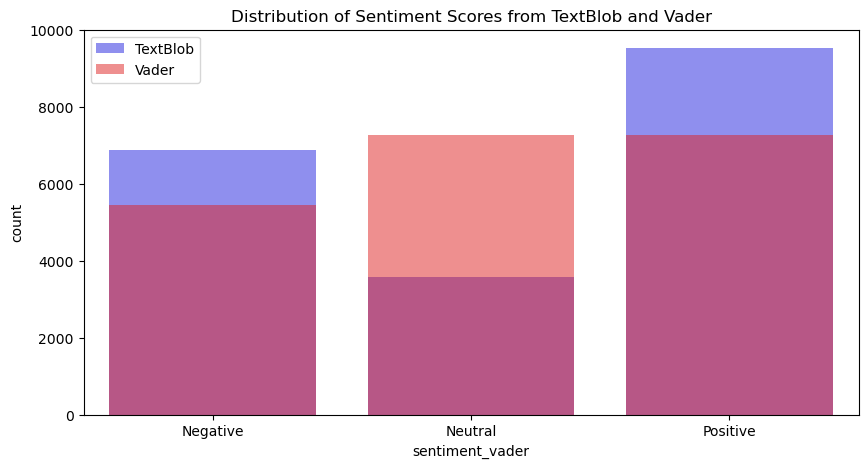

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.countplot(x="sentiment_textblob", data=df, label="TextBlob", color='blue', alpha=0.5)
sns.countplot(x="sentiment_vader", data=df, label="Vader", color='red', alpha=0.5)
plt.legend()
plt.title('Distribution of Sentiment Scores from TextBlob and Vader')
plt.show()

#### B. Sentiment Scores by Time

**Research Question:** How do the sentiment scores from TextBlob and Vader vary over time in the dataset?

In [29]:
df['post_created']

0        Sun Aug 30 07:48:37 +0000 2015
1        Sun Aug 30 07:31:33 +0000 2015
2        Sat Aug 29 22:11:07 +0000 2015
3        Sat Aug 29 18:40:49 +0000 2015
4        Sat Aug 29 18:40:26 +0000 2015
                      ...              
19995    Thu Jan 12 00:14:56 +0000 2017
19996    Thu Jan 12 00:06:18 +0000 2017
19997    Thu Jan 12 00:05:42 +0000 2017
19998    Thu Jan 12 00:05:22 +0000 2017
19999    Thu Jan 12 00:04:47 +0000 2017
Name: post_created, Length: 20000, dtype: object

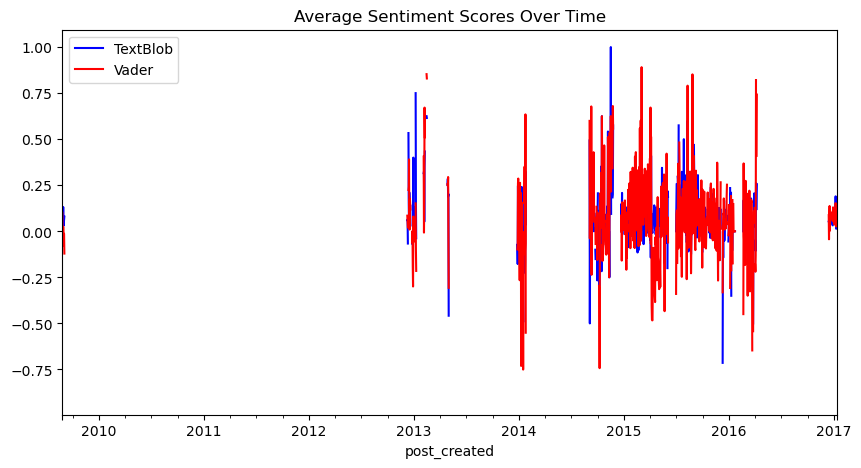

In [25]:
df['post_created'] = pd.to_datetime(df['post_created'])  # Convert to datetime if not already

plt.figure(figsize=(10, 5))
df.resample('D', on='post_created')['sent_textblob_cont'].mean().plot(label="TextBlob", color='blue')
df.resample('D', on='post_created')['sent_vader_cont'].mean().plot(label="Vader", color='red')
plt.legend()
plt.title('Average Sentiment Scores Over Time')
plt.show()

#### C. Sentiment Scores vs. User Popularity

**Research Question:** Is there a correlation between the sentiment scores from TextBlob and Vader and the users' popularity (number of followers) in the dataset?

In [30]:
df.columns

Index(['Unnamed: 0', 'post_id', 'post_created', 'post_text', 'user_id',
       'followers', 'friends', 'favourites', 'statuses', 'retweets', 'label',
       'clean_text', 'sentiment_textblob', 'sent_textblob_cont',
       'sentiment_vader', 'sent_vader_cont'],
      dtype='object')

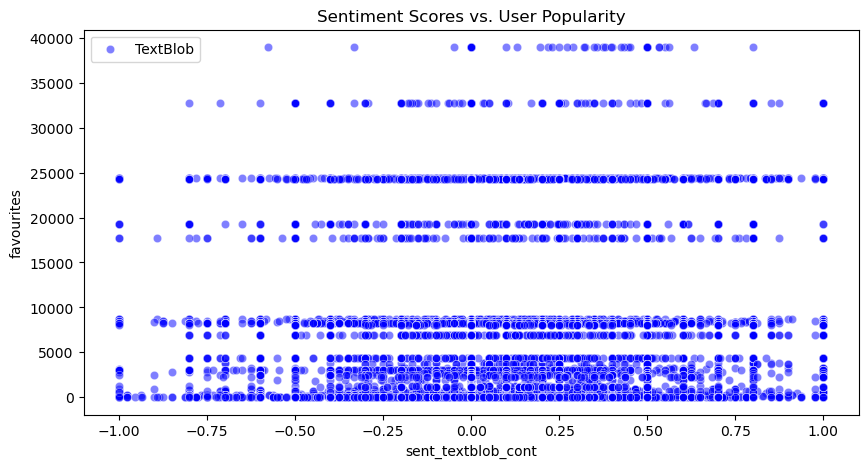

In [35]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x="sent_textblob_cont", y="favourites", data=df, label="TextBlob", color='blue', alpha=0.5)
# sns.scatterplot(x="followers", y="sent_vader_cont", data=df, label="Vader", color='red', alpha=0.5)
# plt.xscale('log')  # Log scale for better visualization if followers vary widely
plt.legend()
plt.title('Sentiment Scores vs. User Popularity')
plt.show()

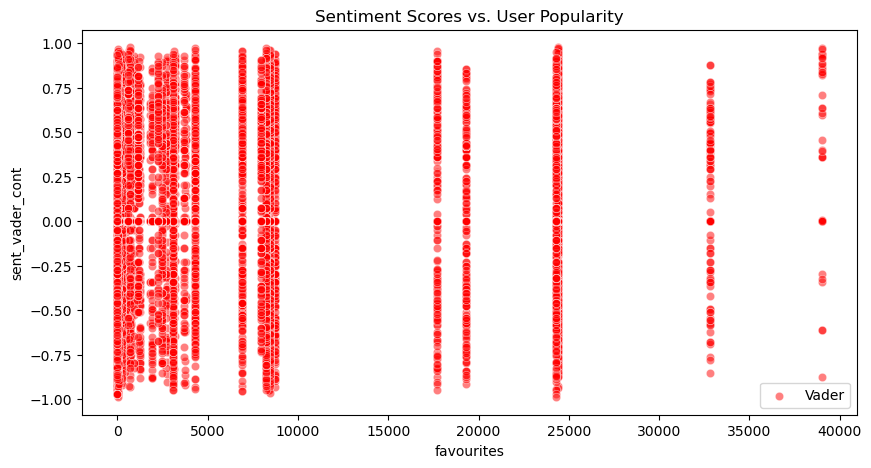

In [37]:
plt.figure(figsize=(10, 5))
# sns.scatterplot(x="followers", y="sent_textblob_cont", data=df, label="TextBlob", color='blue', alpha=0.5)
sns.scatterplot(x="favourites", y="sent_vader_cont", data=df, label="Vader", color='red', alpha=0.5)
# plt.xscale('log')  # Log scale for better visualization if followers vary widely
plt.legend()
plt.title('Sentiment Scores vs. User Popularity')
plt.show()

## 5. Ensuring Reproducibility in Text Analysis

Reproducibility is a key aspect of any data analysis project. It is the idea that your work can be understood and repeated by others. This is important not only for validating your results but also for extending your analysis.

### 5.1 Coding Best Practices

Good coding practices are fundamental for reproducibility. Here are some tips:

- Code organization: Organize your code in a logical and clear manner.
- Code commenting: Comment your code so that others can understand what your code does.
- Version control: Use a version control system like git to keep track of changes in your code.

### 5.2 Documenting Your Analysis

It's important to document each step of your analysis. This includes the preprocessing steps, the model you used, and the parameters for that model. This documentation can be done in the form of Jupyter notebooks, which allow you to include both text and code.

#### 5.3 Sharing Your Data and Code (GitHub)

This allows others to verify your results and build upon your work.